In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Integrate-and-Fire Neuron Model

The integrate-and-fire model is a simple mathematical model of a neuron's electrical behavior. It describes how the neuron's membrane potential changes in response to input currents and how it generates action potentials (spikes) when the potential reaches a certain threshold.

## Key Equations

### 1. Membrane Potential Dynamics

The change in membrane potential (V) over time is described by:

$$\tau \frac{dV}{dt} = -V + RI$$

Where:
- $\tau$ is the membrane time constant
- $R$ is the membrane resistance
- $I$ is the input current

### 2. Discrete Update Rule

In our numerical simulation, we use a discrete-time approximation:

$$\Delta V = \frac{dt}{\tau}(-V + RI)$$

$$V_{t+1} = V_t + \Delta V$$

### 3. Spike Generation

A spike is generated when the membrane potential reaches the threshold $V_{th}$:

$$\text{If } V \geq V_{th} \text{, then generate a spike and reset } V = 0$$

## Model Parameters

- Membrane time constant ($\tau$): Determines how quickly the neuron's potential decays.
- Membrane resistance ($R$): Affects the neuron's sensitivity to input current.
- Threshold ($V_{th}$): The potential at which the neuron fires an action potential.

In [2]:
class IntegrateAndFireNeuron:
    def __init__(self, tau=10.0, R=1.0, threshold=1.0):
        self.tau = tau  # Membrane time constant
        self.R = R  # Membrane resistance
        self.threshold = threshold  # Spike threshold
        self.v = 0  # Initial membrane potential
        self.v_history = []  # To store membrane potential history
        self.spike_times = []  # To store spike times

    def update(self, I, dt):
        # Update membrane potential
        dv = (-(self.v) + self.R * I) * (dt / self.tau)
        self.v += dv
        self.v_history.append(self.v)
        
        # Check for spike
        if self.v >= self.threshold:
            self.spike_times.append(len(self.v_history) * dt)
            self.v = 0  # Reset potential after spike

    def simulate(self, I, dt, T):
        n_steps = int(T / dt)
        for _ in range(n_steps):
            self.update(I, dt)
        
        return np.array(self.v_history), np.array(self.spike_times)

In [3]:
# Simulation parameters
T = 100  # Total simulation time
dt = 0.1  # Time step
t = np.arange(0, T, dt)  # Time array

# Create neuron
neuron = IntegrateAndFireNeuron()
I = 1.5  # Input current
v, spikes = neuron.simulate(I, dt, T)

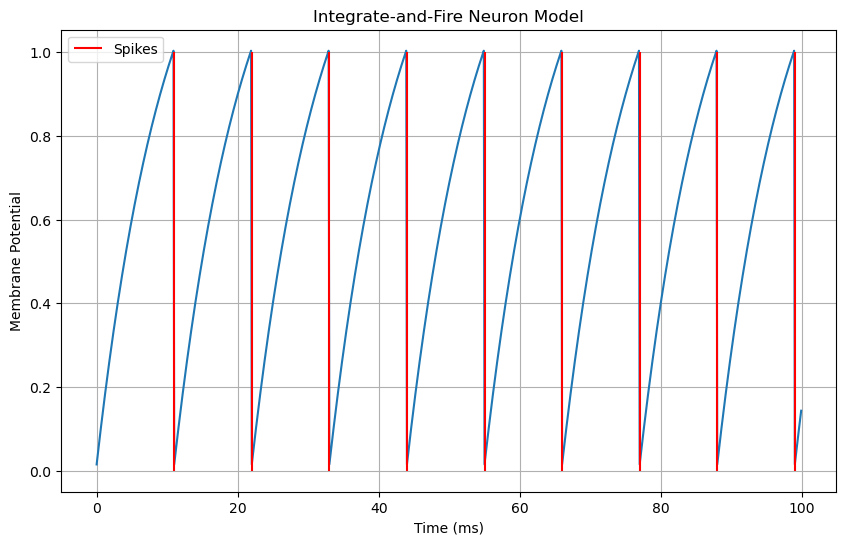

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(t, v)
plt.vlines(spikes, 0, 1, color='r', label='Spikes')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential')
plt.title('Integrate-and-Fire Neuron Model')
plt.legend()
plt.grid(True)
plt.show()

# Integrate-and-Fire and Leaky Integrate-and-Fire Models: 
---

## 1. Basic Electrical Principles

- Ohm's Law: $V = IR$
- Capacitance: $C = \frac{Q}{V}$, where $Q$ is charge
- Current: $I = \frac{dQ}{dt}$

These principles form the foundation of our neuronal models.

---

## 2. Derivation of Integrate-and-Fire Model

Step 1: Consider a capacitor with capacitance $C$

Step 2: Express current in terms of charge:
$$I = \frac{dQ}{dt}$$

Step 3: Use the definition of capacitance:
$$Q = CV$$

Step 4: Differentiate both sides of $Q = CV$ with respect to time:
$$\frac{dQ}{dt} = C \frac{dV}{dt}$$

Step 5: Substitute into the equation from Step 2:
$$I = C \frac{dV}{dt}$$

Step 6: Rearrange to get the final equation:
$$C \frac{dV}{dt} = I$$

This is the basic integrate-and-fire equation, where $I$ represents the input current to the neuron.

---

## 3. Derivation of Leaky Integrate-and-Fire Model

Step 1: Start with the basic integrate-and-fire equation:
$$C \frac{dV}{dt} = I$$

Step 2: Add a term for the leak current:
$$C \frac{dV}{dt} = I - I_{leak}$$

Step 3: Express leak current in terms of $V$ and $R$ using Ohm's Law:
$$I_{leak} = \frac{V}{R}$$

Step 4: Substitute into the equation from Step 2:
$$C \frac{dV}{dt} = I - \frac{V}{R}$$

Step 5: Rearrange to get the final equation:
$$C \frac{dV}{dt} = -\frac{V}{R} + I$$

This is the leaky integrate-and-fire equation.

---

## 4. Discrete-Time Approximation

To simulate these models computationally, we need to discretize the equations.

Using Euler's method with time step $\Delta t$:

1. Integrate-and-Fire:
   $$V_{t+1} = V_t + \frac{\Delta t}{C} I_t$$

2. Leaky Integrate-and-Fire:
   $$V_{t+1} = V_t + \frac{\Delta t}{\tau} (-V_t + RI_t)$$

   Where $\tau = RC$ is the membrane time constant.

---

## 5. Computational Steps: Integrate-and-Fire

1. Initialize $V = V_{reset}$, $t = 0$
2. For each time step:
   a. Compute $\Delta V = \frac{\Delta t}{C} I_t$
   b. Update $V_{t+1} = V_t + \Delta V$
   c. If $V_{t+1} \geq V_{th}$:
      - Record spike
      - Reset $V_{t+1} = V_{reset}$
   d. Increment $t$

---

## 6. Computational Steps: Leaky Integrate-and-Fire

1. Initialize $V = V_{reset}$, $t = 0$
2. For each time step:
   a. Compute $\Delta V = \frac{\Delta t}{\tau} (-V_t + RI_t)$
   b. Update $V_{t+1} = V_t + \Delta V$
   c. If $V_{t+1} \geq V_{th}$:
      - Record spike
      - Reset $V_{t+1} = V_{reset}$
   d. Increment $t$

---

## 7. Spiking and Refractory Period

- When $V$ reaches the threshold voltage $V_{th}$, a spike is generated.
- Immediately after a spike, $V$ is reset to $V_{reset}$.
- After a spike, neurons typically have a brief refractory period during which they cannot fire again, regardless of input. This can be modeled by holding $V$ at $V_{reset}$ for a fixed duration after each spike.

---

## 8. Comparison of Models

- The integrate-and-fire model is simpler but less realistic.
- The leaky integrate-and-fire model is more biologically plausible as it includes the leak current, which represents the passive properties of the neuronal membrane.
- The leak current in the leaky integrate-and-fire model allows the membrane potential to return to its resting state in the absence of input, unlike the basic integrate-and-fire model.

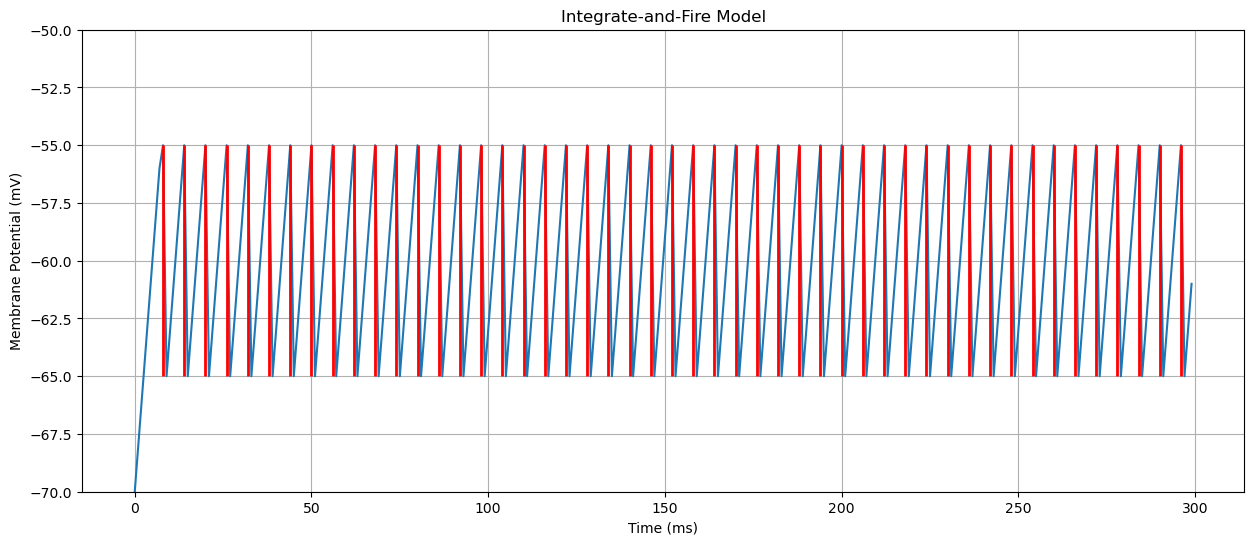

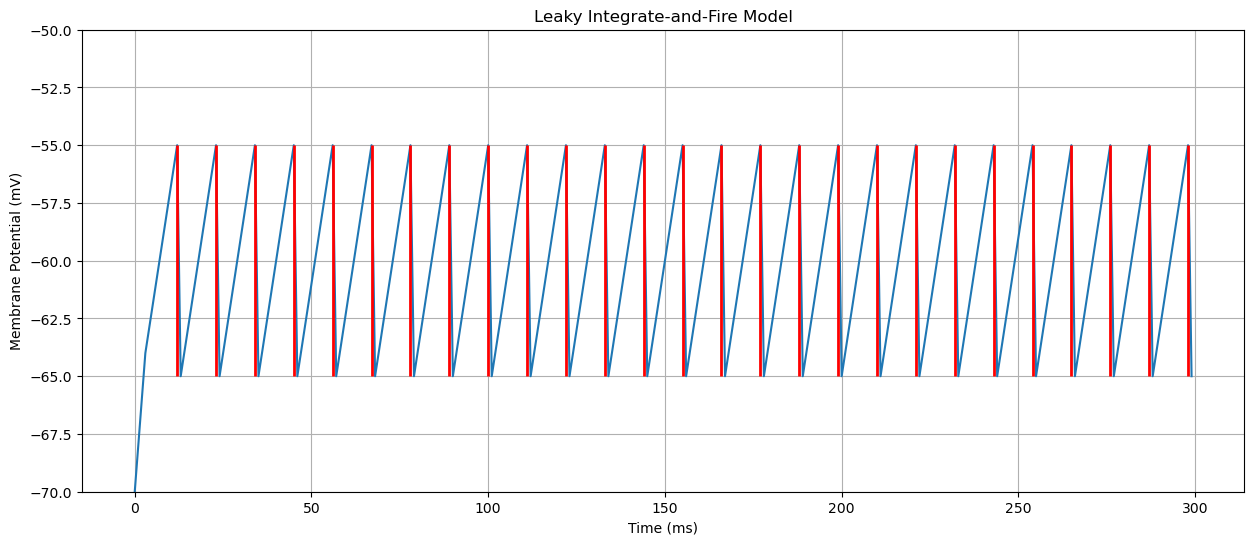

Number of spikes (Integrate-and-Fire): 49
Number of spikes (Leaky Integrate-and-Fire): 27


In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Simulation parameters
dt = 1  # Time step (ms)
T = 300  # Total simulation time (ms)
t = np.arange(0, T, dt)  # Time array

# Neuron parameters
V_rest = -70  # Resting potential (mV)
V_reset = -65  # Reset potential (mV)
V_th = -55  # Threshold potential (mV)
R = 10  # Membrane resistance (MΩ)
C = 1  # Membrane capacitance (nF)
tau = R * C  # Membrane time constant (ms)

# Input current (step function with lower values)
I = 1.5 * np.ones(len(t))  # Constant input current

def integrate_and_fire(I, dt, T, V_rest, V_reset, V_th, C):
    V = np.full(len(t), V_rest)
    spikes = []
    
    for i in range(1, len(t)):
        if V[i-1] >= V_th:
            V[i] = V_reset
            spikes.append(t[i-1])
        else:
            dV = (I[i] * dt) / C
            V[i] = V[i-1] + dV
        
        V[i] = min(V[i], V_th)  # Ensure V doesn't exceed threshold
    
    return V, spikes

def leaky_integrate_and_fire(I, dt, T, V_rest, V_reset, V_th, R, tau):
    V = np.full(len(t), V_rest)
    spikes = []
    
    for i in range(1, len(t)):
        if V[i-1] >= V_th:
            V[i] = V_reset
            spikes.append(t[i-1])
        else:
            dV = (-V[i-1] + V_rest + R * I[i]) * (dt / tau)
            V[i] = V[i-1] + dV
        
        V[i] = min(V[i], V_th)  # Ensure V doesn't exceed threshold
    
    return V, spikes

V_if, spikes_if = integrate_and_fire(I, dt, T, V_rest, V_reset, V_th, C)
V_lif, spikes_lif = leaky_integrate_and_fire(I, dt, T, V_rest, V_reset, V_th, R, tau)

def plot_results(t, V, spikes, title):
    plt.figure(figsize=(15, 6))
    plt.plot(t, V)
    plt.vlines(spikes, V_reset, V_th, color='r', linewidth=2)
    plt.title(title)
    plt.xlabel('Time (ms)')
    plt.ylabel('Membrane Potential (mV)')
    plt.ylim(V_reset - 5, V_th + 5)
    plt.grid(True)
    plt.show()

# Plot the results
plot_results(t, V_if, spikes_if, 'Integrate-and-Fire Model')
plot_results(t, V_lif, spikes_lif, 'Leaky Integrate-and-Fire Model')

print(f"Number of spikes (Integrate-and-Fire): {len(spikes_if)}")
print(f"Number of spikes (Leaky Integrate-and-Fire): {len(spikes_lif)}")